In [54]:
class EDA:
    
    def __init__(self):
        import pandas as pd
        import matplotlib.pyplot as plt
        import seaborn as sns
        import numpy as np
        self._np = np
        self._pd = pd
        self._sns = sns
        self._plt = plt
        
    def scatter_plot_2_var(self,x,y,category=None):
        """ This takes two variables - both continuous and draws a scatter-plot. If
        you want a category to be added, you can do that by defining that as 3rd var.
        """
        self._sns.set(font_scale=1.5)
        self._sns.scatterplot(x=x,y=y,hue=category);
        return None
    
    def category_value_distribution(self,pandas_DataFrame):
        """Objective of this function is to check to what extent the 
        data is un-balanced. You may choose to remove some categories and do stratified
        split of train-test based on that"""
        df = pandas_DataFrame
        flds = {}
        
        for column,content in df.items():
            D1={}
            
            for v in self._np.unique(df[column]): #pick all values only once
                if len(np.unique(df[column])) > 10:
                    print(f"Field {column} has more than 10 values. Remove it and check.")
                    break
                else:
                    D1[v] = len(df[column][df[column] == v]) #build the dict by slicing by each value
            
                
            flds[column]=D1 #Feed this dictionary to another 
                
        return flds
    
    def scatterplot_matrix(self,df,category=None):
        "Category should be one of the column names of the dataframe which is being fed"
        
        F = 0
        for column,content in df.items():
            if len(np.unique(content)) < 10 and column != category:
                print(f"Column {column} has less than 10 values. Remove it and check")
                F = 1
                break
                
        if F == 0:
            self._sns.pairplot(df,hue=category,diag_kind='kde');
        else:
            print("Too less value to check in scatter-plot")
            
        return None
        
    def line_plot(self,*x):
        """ WORK-IN-PROGRESS This accepts a tuple of pandas series, has to be given
        separately like df['A'],df['B']... etc. The Dataframe as a whole is not
        accepted yet"""
        n1 = len(x)
        nrows = round(n1/2) # 
        self._sns.set(font_scale=1.5)
        
        if nrows == 0:
            self._plt.plot(x[0])
            self._plt.ylabel(x[0].name)
        
        elif nrows == 1:
            fig,ax1 = self._plt.subplots(nrows=1, ncols=2,figsize=(12,4))
            ax1[0].plot(x[0])
            ax1[0].set(ylabel=x[0].name)
            
            ax1[1].plot(x[1])
            ax1[1].set(ylabel=x[1].name)
            
        else:
            fig,ax = self._plt.subplots(nrows=nrows, ncols=2,figsize=(12,nrows*4))

            for i,pdseries in enumerate(x):
                p1 = i//2
                p2 = i%2
                ax[p1,p2].plot(pdseries.values)
                ax[p1,p2].set(ylabel=pdseries.name)
            self._plt.show()

In [55]:
eda = EDA()

In [2]:
import numpy as np

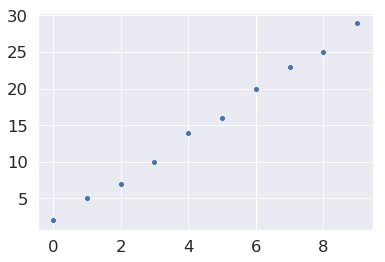

In [59]:
np.random.seed(10)
x = np.arange(10)
y = 3*x +np.random.randint(1,4,10)
z = np.tanh(x) + np.random.rand(10)/10
eda.scatter_plot_2_var(x,y)

In [18]:
import pandas as pd
D = pd.DataFrame({'x':x,'y':y})

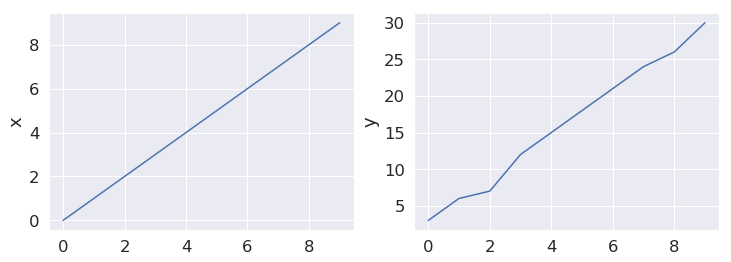

In [19]:
eda.line_plot(D.iloc[:,0],D.iloc[:,1])

In [48]:
df = pd.DataFrame({'X':x,'Y':y,'Z':z})
df.head(3)

,X,Y,Z
0,0,1,0.010372
1,1,5,0.814773
2,2,7,0.992898


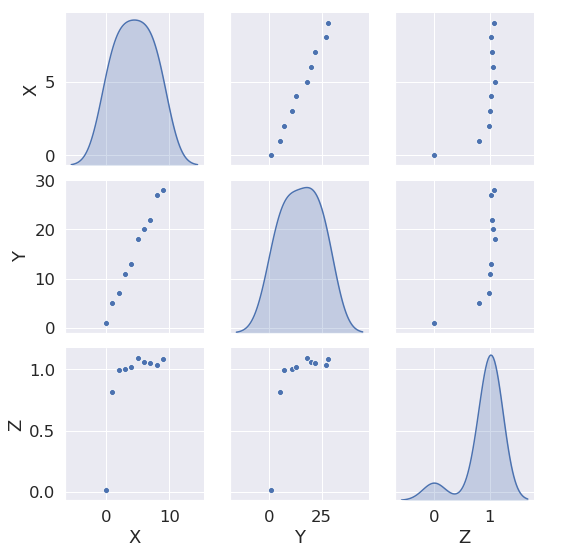

In [60]:
eda.scatterplot_matrix(df)

In [25]:
len(['cold','cold','medium','medium',
                                         'hot','hot','hot','hot','medium',
                                        'medium','cold','cold'])

12

In [35]:
D1 = {'Month':np.arange(1,13),
      'Wether':['cold','cold','medium','medium','hot','hot','hot','hot','medium',
                 'medium','cold','cold'],
     'rain':['No','No','Sometimes','Sometimes','Sometimes','Yes','Yes','Yes',
             'Sometimes','Sometimes','No','No']}
df = pd.DataFrame(D1)

In [36]:
df.head(3)

,Month,Wether,rain
0,1,cold,N
1,2,cold,N
2,3,medium,Sometimes


In [45]:
eda.category_value_distribution(df)

Field Month has more than 10 values. Remove it and check.


{'Month': {},
 'Wether': {'cold': 4, 'hot': 4, 'medium': 4},
 'rain': {'N': 4, 'Sometimes': 5, 'Y': 3}}